In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

import matplotlib.pyplot as plt



/Users/jackbutlin/Documents/GitHub/simple-long-short-equity-strategy-in-python/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
stock_names = ['SPY', 'META', 'GOOGL', 'MSFT']

end_date = datetime.today()
n_years = 5
start_date = end_date - timedelta(days=n_years * 365)

stock_data = yf.download(
    tickers=stock_names,
    start=start_date,
    end=end_date
)

print("Columns in stock_data:", stock_data.columns)

if 'Adj Close' in stock_data.columns:
    price_block = stock_data['Adj Close']
else:
    price_block = stock_data['Close']

df = pd.concat([price_block[t] for t in stock_names], axis=1)
df.columns = stock_names

print(df.head())






[*********************100%***********************]  4 of 4 completed

Columns in stock_data: MultiIndex([( 'Close', 'GOOGL'),
            ( 'Close',  'META'),
            ( 'Close',  'MSFT'),
            ( 'Close',   'SPY'),
            (  'High', 'GOOGL'),
            (  'High',  'META'),
            (  'High',  'MSFT'),
            (  'High',   'SPY'),
            (   'Low', 'GOOGL'),
            (   'Low',  'META'),
            (   'Low',  'MSFT'),
            (   'Low',   'SPY'),
            (  'Open', 'GOOGL'),
            (  'Open',  'META'),
            (  'Open',  'MSFT'),
            (  'Open',   'SPY'),
            ('Volume', 'GOOGL'),
            ('Volume',  'META'),
            ('Volume',  'MSFT'),
            ('Volume',   'SPY')],
           names=['Price', 'Ticker'])
                   SPY        META       GOOGL        MSFT
Date                                                      
2021-02-04  360.499207  264.641418  101.911499  232.218201
2021-02-05  361.918091  266.240204  103.658287  232.400543
2021-02-08  364.531830  264.730774  103.44

In [3]:
stock_log_returns = np.log(df/df.shift(1))
average_log_return = stock_log_returns.mean(1)



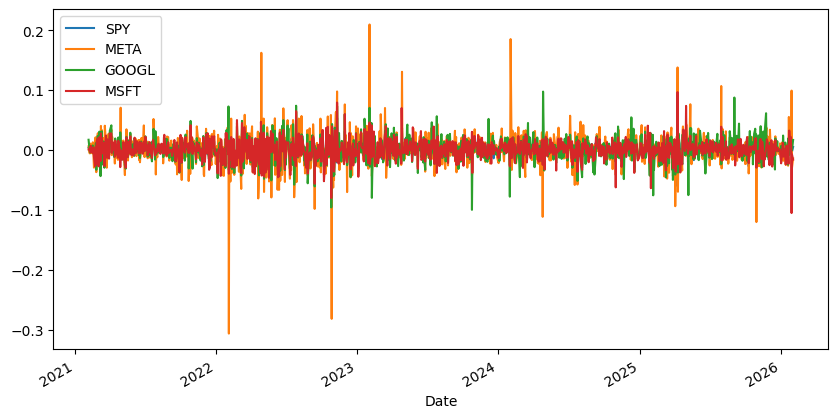

In [4]:
stock_log_returns.plot(figsize=(10,5))
plt.show()

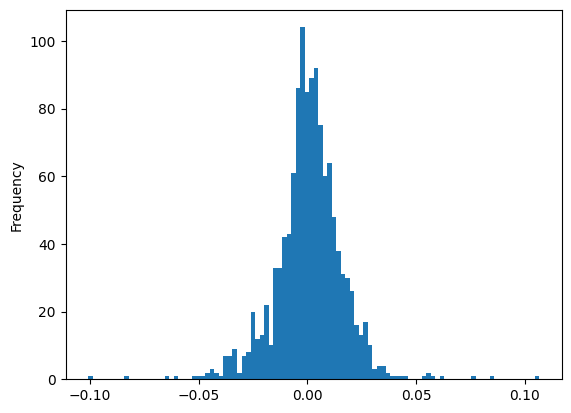

In [5]:
average_log_return.plot.hist(bins=100)
plt.show()

In [6]:
## stock allocation.

In [9]:
average_log_returns = stock_log_returns.mean(axis=1)
absolute_weights = weights.abs()
absolute_weights_sum = np.sum(absolute_weights, axis=1)
adjusted_weights = weights.div(absolute_weights_sum, axis=0).dropna()


NameError: name 'weights' is not defined

In [10]:
adjusted_weights.tail(3)

NameError: name 'adjusted_weights' is not defined

In [11]:
ptf_daily_returns = (adjusted_weights.shift(1) * stock_log_returns).dropna()

NameError: name 'adjusted_weights' is not defined

In [12]:
ptf_daily_returns.plot(figsize=(10,5)) 
plt.show()

NameError: name 'ptf_daily_returns' is not defined

In [ ]:
## daily strategy returns

In [13]:
daily_strategy_returns = np.sum(ptf_daily_returns, axis=1)
daily_strategy_returns.plot.hist(bins=100)
plt.show()

NameError: name 'ptf_daily_returns' is not defined

In [14]:
ann_avg_ret = 252 * np.mean(daily_strategy_returns)
print(ann_avg_ret)

NameError: name 'daily_strategy_returns' is not defined